# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import openpyxl

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ref10 = pd.read_excel('/content/drive/My Drive/2021 생물정보학실습/2. Logistic regression/ref10_3rdSheet.xlsx', sheet_name='Table S2. Sample level info')

In [4]:
ref10.columns # 컬럼의 종류

Index(['sample', 'patient', 'time', 'aCTLA4_response', 'aPD1_response',
       'tumor_purity', 'n_nonsynonymous', 'n_neoantigen',
       'n_clones_by_expands', 'n_clones_by_sciclone', 'n_copy_gain',
       'n_copy_loss'],
      dtype='object')

In [5]:
ref10.head() # 생긴 모양

,sample,patient,time,aCTLA4_response,aPD1_response,tumor_purity,n_nonsynonymous,n_neoantigen,n_clones_by_expands,n_clones_by_sciclone,n_copy_gain,n_copy_loss
0,31A,31,preCTLA4,response,NaN,0.85,819,997,9,2,88.0,0.0
1,34A,34,preCTLA4,nonresponse,response,0.85,3123,5628,17,6,917.0,1129.0
2,50A,50,preCTLA4,nonresponse,nonresponse,0.95,3445,6037,17,2,1008.0,1581.0
3,9A,9,preCTLA4,nonresponse,response,0.85,84,117,5,3,674.0,2400.0
4,5A,5,preCTLA4,response,NaN,0.95,404,296,6,3,0.0,0.0


neoantigen의 수에 따른 예후를 기준으로 완치/비완치? 를 분류할 것임.


In [6]:
ref10 = ref10[['sample', 'n_neoantigen', 'aPD1_response']]
ref10
# 샘플에 따른 pd1반응과 neoantigen 수.
# 문제는 nan값이 중간에 있음;;

# 여기서는 결측치를 그냥 없애겠음.

,sample,n_neoantigen,aPD1_response
0,31A,997,NaN
1,34A,5628,response
2,50A,6037,nonresponse
3,9A,117,response
4,5A,296,NaN
5,7A,115,response
6,25A,477,nonresponse
7,32A,72,nonresponse
8,47A,2958,response
9,41A,176,nonresponse


In [7]:
# ref10.dropna(inplace=True)  같은 코드임.
ref10 = ref10.dropna() # 결측치를 버림.

ref10

,sample,n_neoantigen,aPD1_response
1,34A,5628,response
2,50A,6037,nonresponse
3,9A,117,response
5,7A,115,response
6,25A,477,nonresponse
7,32A,72,nonresponse
8,47A,2958,response
9,41A,176,nonresponse
10,20A,3982,nonresponse
11,33A,266,nonresponse


In [8]:
ref10['label'] = ref10['aPD1_response'].map(lambda x: 1 if x == 'response' else 0) # 이진으로 바꿈.

ref10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sample,n_neoantigen,aPD1_response,label
1,34A,5628,response,1
2,50A,6037,nonresponse,0
3,9A,117,response,1
5,7A,115,response,1
6,25A,477,nonresponse,0
7,32A,72,nonresponse,0
8,47A,2958,response,1
9,41A,176,nonresponse,0
10,20A,3982,nonresponse,0
11,33A,266,nonresponse,0


학습을 시작해봅시다.

In [9]:
ref24 = pd.read_excel('/content/drive/My Drive/2021 생물정보학실습/2. Logistic regression/ref24_1stSheet.xlsx', skiprows=[0])
# 첫번째 시트를 불러옴. 첫 줄을 건너뛰고 밑에부터 불러옴.
ref24

,#,Study ID,"Cohort (Discovery, Validation)",Histology,Age (years),Sex,Smok.^,Pack-years,PD-L1*,Priors^^,Dose (mg/kg),Sched.**,PFS (mos),Event ^^^,Resp ^^^^,Durable Clinical Benefit,Nonsyn.,Smok. Sig. ^^^^^,Neoant.,Total exonic
0,1,SA9755,Valid,NSCLC NOS,63.0,F,Former,36.00,Weak,1.0,10.0,3.0,8.366667,0.0,PR,DCB,1192.0,TH,576.0,1732.0
1,2,HE3202,Disc,Adeno,63.0,F,Former,58.00,Strong,3.0,10.0,3.0,14.666667,0.0,PR,DCB,746.0,TH,610.0,1011.0
2,3,TU0428,Disc,Adeno,66.0,M,Current,48.00,Negative,0.0,10.0,3.0,2.066667,1.0,POD,NDB,626.0,TH,446.0,992.0
3,4,Y2087,Valid,Adeno,68.0,F,Never,0.00,Weak,5.0,10.0,3.0,8.333333,1.0,SD,DCB,507.0,TL,358.0,914.0
4,6,RI1933,Disc,Adeno,60.0,F,Former,21.00,Strong,1.0,10.0,3.0,16.600000,0.0,PR,DCB,473.0,TH,228.0,622.0
5,5,M4945,Valid,Adeno,66.0,M,Former,40.00,Unknown,3.0,10.0,2.0,14.600000,0.0,PR,DCB,427.0,TH,300.0,685.0
6,7,ZA6505,Valid,Adeno,76.0,F,Never,0.00,Negative,6.0,10.0,3.0,1.933333,1.0,POD,NDB,378.0,TL,209.0,558.0
7,8,CU9061,Valid,Squam,57.0,M,Former,39.00,Weak,1.0,2.0,3.0,3.966667,0.0,SD,NR,368.0,TH,271.0,552.0
8,9,CA9903,Disc,Adeno,57.0,M,Former,80.00,Strong,3.0,10.0,3.0,14.500000,1.0,PR,DCB,324.0,TH,226.0,494.0
9,12,KA3947,Disc,Adeno,64.0,F,Former,52.50,Strong,0.0,10.0,3.0,8.133333,1.0,SD,DCB,302.0,TH,114.0,426.0


In [10]:
# 데이터를 보아하니 필요한 내요응 33번 row까지이고, 필요한 칼럼은 studyID와 PD-L1 반응성, neoantigen 수.

ref24 = ref24[:34]
ref24 = ref24[['Study ID', 'Neoant. ','PD-L1*']]
ref24

,Study ID,Neoant.,PD-L1*
0,SA9755,576.0,Weak
1,HE3202,610.0,Strong
2,TU0428,446.0,Negative
3,Y2087,358.0,Weak
4,RI1933,228.0,Strong
5,M4945,300.0,Unknown
6,ZA6505,209.0,Negative
7,CU9061,271.0,Weak
8,CA9903,226.0,Strong
9,KA3947,114.0,Strong


문제는 종류가 strong, weak, negative, unknown 4가지가 있다는 것. 
unknown은 버리고, negative만 아니면 1로 넣음.

In [11]:
label = []
for i in ref24['PD-L1*'].to_numpy():
    if i == 'Weak': 
        label.append(1)
    elif i == 'Strong':
        label.append(1)
    elif i == 'Negative':
        label.append(0)
    elif i == 'Unknown':
        label.append(np.nan)

label

[1,
 1,
 0,
 1,
 1,
 nan,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 nan,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 nan,
 nan]

In [12]:
ref24['label'] = label
ref24 = ref24.dropna()
ref24


,Study ID,Neoant.,PD-L1*,label
0,SA9755,576.0,Weak,1.0
1,HE3202,610.0,Strong,1.0
2,TU0428,446.0,Negative,0.0
3,Y2087,358.0,Weak,1.0
4,RI1933,228.0,Strong,1.0
6,ZA6505,209.0,Negative,0.0
7,CU9061,271.0,Weak,1.0
8,CA9903,226.0,Strong,1.0
9,KA3947,114.0,Strong,1.0
10,SC0899,191.0,Weak,1.0


2번째 파일 전처리 완료.

3~4번째 것까지 해서, 한번에 병합할거임.

In [13]:
ref25 = pd.read_excel('/content/drive/My Drive/2021 생물정보학실습/2. Logistic regression/ref25_1stSheet.xlsx', skiprows=[0, 1], sheet_name='Table S2')

In [14]:
ref25 = ref25[['Patient ID', 'Predicted neoantigen burden', 'Best Overall Response']]
ref25

,Patient ID,Predicted neoantigen burden,Best Overall Response
0,1,160,PD
1,2,216,PR
2,3,32,SD
3,4,263,SD
4,5,451,SD
...,...,...,...
70,72,9,PD
71,73,2051,PR
72,74,1295,SD
73,43,517,SD


In [15]:
ref25['label'] = ref25['Best Overall Response'].map(lambda x: 1 if x.endswith('R') else 0) # R로 끝나면 1이고 아니면 0인 걸로.
ref25

,Patient ID,Predicted neoantigen burden,Best Overall Response,label
0,1,160,PD,0
1,2,216,PR,1
2,3,32,SD,0
3,4,263,SD,0
4,5,451,SD,0
...,...,...,...,...
70,72,9,PD,0
71,73,2051,PR,1
72,74,1295,SD,0
73,43,517,SD,0


마지막.

In [16]:
ref21 = pd.read_excel('/content/drive/My Drive/2021 생물정보학실습/2. Logistic regression/ref21_2ndSheet.xlsx', sheet_name = 'exome analysis (n=110)')

In [17]:
ref21 = ref21[['patient', 'neos500', 'group']]

In [18]:
ref21 = ref21[~ref21['group'].str.contains('long')] # group에 long이 없을 경우만 골라서

In [19]:
ref21['answer'] = ref21['group'].map(lambda x: 1 if x == 'response' else 0) # response면 1.

In [20]:
ref21

,patient,neos500,group,answer
0,Pat02,244,response,1
1,Pat03,475,nonresponse,0
2,Pat04,568,response,1
3,Pat06,382,nonresponse,0
4,Pat07,147,response,1
...,...,...,...,...
105,Pat86,111,nonresponse,0
106,Pat88,2285,response,1
107,Pat90,330,response,1
108,Pat92,21,nonresponse,0


In [21]:
ref21.columns = ['sample', 'mutations', 'pd1', 'label']
ref10.columns = ['sample', 'mutations', 'pd1', 'label']
ref25.columns = ['sample', 'mutations', 'pd1', 'label']
ref24.columns = ['sample', 'mutations', 'pd1', 'label']
# 칼럼 이름을 바꿔주고

In [22]:
lung = pd.concat([ref25, ref24], axis = 0)
melanoma = pd.concat([ref21, ref10], axis = 0)
# 합치면

In [23]:
lung

,sample,mutations,pd1,label
0,1,160.0,PD,0.0
1,2,216.0,PR,1.0
2,3,32.0,SD,0.0
3,4,263.0,SD,0.0
4,5,451.0,SD,0.0
...,...,...,...,...
27,RO3338,112.0,Weak,1.0
28,LO5004,87.0,Weak,1.0
29,GR0134,30.0,Negative,0.0
30,NI9507,18.0,Weak,1.0


In [24]:
melanoma

,sample,mutations,pd1,label
0,Pat02,244,response,1
1,Pat03,475,nonresponse,0
2,Pat04,568,response,1
3,Pat06,382,nonresponse,0
4,Pat07,147,response,1
...,...,...,...,...
48,49E,2473,nonresponse,0
49,20E,3950,nonresponse,0
50,42E,287,nonresponse,0
51,45E,184,nonresponse,0


# Train Logistic regression 

lung과 melanoma가 있는 상태.
col 순서는 sampel / mutation수 / pd1의 반응을 label에서 0,1로 나타냈다.

In [25]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV # logistic regression. CV는 cross validation 에 사용.
from sklearn.model_selection import train_test_split # 샘플 나누는 작업
from sklearn.model_selection import GridSearchCV # 그리드서치. 최적의 파라미터(penalty 등등) 찾아줌.

# n_jobs ; 돌릴 CPU core 개수. -1을 넣으면 모든 코어 사용(다른 작업 불가)

## lung

In [26]:
np.array(lung['mutations']).reshape(-1,1)

array([[ 160.],
       [ 216.],
       [  32.],
       [ 263.],
       [ 451.],
       [ 214.],
       [ 288.],
       [ 510.],
       [ 121.],
       [ 191.],
       [ 341.],
       [1256.],
       [ 920.],
       [ 780.],
       [ 248.],
       [  15.],
       [ 524.],
       [ 218.],
       [ 327.],
       [3170.],
       [ 125.],
       [  79.],
       [ 347.],
       [  37.],
       [ 192.],
       [  20.],
       [1628.],
       [  24.],
       [ 447.],
       [1858.],
       [1867.],
       [ 321.],
       [ 412.],
       [ 404.],
       [ 322.],
       [  27.],
       [4350.],
       [ 741.],
       [ 311.],
       [ 294.],
       [  98.],
       [ 502.],
       [1338.],
       [3017.],
       [ 292.],
       [2297.],
       [  52.],
       [ 330.],
       [ 124.],
       [ 693.],
       [ 120.],
       [ 285.],
       [ 367.],
       [ 781.],
       [ 425.],
       [ 120.],
       [ 804.],
       [  99.],
       [ 153.],
       [ 372.],
       [ 525.],
       [ 302.],
       [

In [30]:
xTrain, xTest, yTrain, yTest = train_test_split(np.array(lung['mutations']).reshape(-1,1), lung['label'], test_size = 0.1) # 9:1로 나눔.


grid_values = {
              'penalty': ['l1','l2', 'elasticnet', None],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'cv':[2,3,4,5,6]
               }


lr = LogisticRegressionCV() # cross validation 할 수 있는 객체 생성
model_lr = GridSearchCV(lr, param_grid=grid_values) # 그리드서치 안에, 어떤 형태의 학습을 사용할지(lr이 logistic regression object니까 그대로 최적화됨.)

In [33]:
model_lr.fit(xTrain, yTrain) # 학습

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None,
                                            dual=False, fit_intercept=True,
                                            intercept_scaling=1.0,
                                            l1_ratios=None, max_iter=100,
                                            multi_class='auto', n_jobs=None,
                                            penalty='l2', random_state=None,
                                            refit=True, scoring=None,
                                            solver='lbfgs', tol=0.0001,
                                            verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'cv': [2, 3, 4, 5, 6],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='

In [34]:
model_lr.score(xTest, yTest) # 테스트. 선형회귀처럼 정확도(오차)를 구하는 것과는 달리, 분류 문제부터는 점수를 틀리고/맞고가 결정되므로 점수를 매길 수 있음.

0.36363636363636365

# Confusion matrix

confusion matrix를 그려봅시다. TP, FP, TN, FN. 

In [35]:
from sklearn.metrics import confusion_matrix # confusion matrix 그려주는 lib.

pred = model_lr.predict(xTest) # 예측값을 그려줌.
confusion_matrix(yTest, pred) # 실제 ytest값과, 예측값을 갖고 생성.

array([[3, 2],
       [5, 1]])

In [36]:
print(confusion_matrix.__doc__)

Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If ``None`` is given, those that appear at least once
        in ``y

In [37]:
np.bincount(yTrain)

array([52, 42])

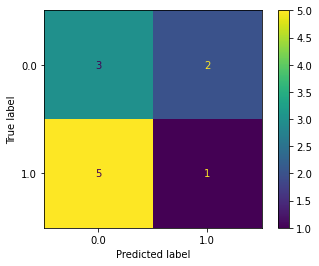

In [38]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_lr, xTest, yTest) 

# ROC Curve

In [47]:
 model_lr.predict_proba(xTest)#[:,1] # 예측 확률의 

array([[0.49096698, 0.50903302],
       [0.54069254, 0.45930746],
       [0.52489622, 0.47510378],
       [0.45491891, 0.54508109],
       [0.50028583, 0.49971417],
       [0.54795758, 0.45204242],
       [0.54443749, 0.45556251],
       [0.55311893, 0.44688107],
       [0.54586809, 0.45413191],
       [0.55026506, 0.44973494],
       [0.41405162, 0.58594838]])

In [46]:
 model_lr.predict_proba(xTest)[:,1]

array([0.50903302, 0.45930746, 0.47510378, 0.54508109, 0.49971417,
       0.45204242, 0.45556251, 0.44688107, 0.45413191, 0.44973494,
       0.58594838])

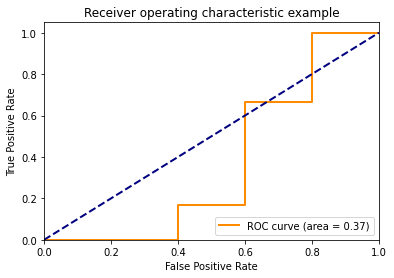

In [43]:
from sklearn.metrics import roc_curve, auc # ROC lib.
import matplotlib.pyplot as plt # plt 불러줌.


# Compute ROC curve and ROC area for each class
fpr = dict() # false positive rate
tpr = dict() # true positive rate.
roc_auc = dict()

for i in range(1): # 한번 돌면서
    fpr[i], tpr[i], _ = roc_curve(yTest,  model_lr.predict_proba(xTest)[:,1]) # 각자 fpr과 tpr을 계산.
    roc_auc[i] = auc(fpr[i], tpr[i]) # 두 값에 따른 roc_auc 점들을 구함.


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yTest.ravel(), pred.ravel()) # ravel()이란? 1차원 벡터로 변환.
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange', # x,y값과 curve를 채워서 
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # 대각선 선 하나 그려줌.
plt.xlim([0.0, 1.0]) # x축 범위
plt.ylim([0.0, 1.05]) # y축 범위
plt.xlabel('False Positive Rate') # x축이름
plt.ylabel('True Positive Rate') # y축이름
plt.title('Receiver operating characteristic example') # 이름
plt.legend(loc="lower right") # 레전드 어디다 둘지
plt.show() # 보여줘보쇼

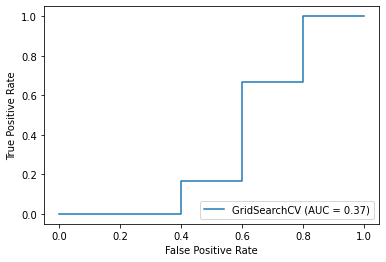

In [44]:
from sklearn.metrics import plot_roc_curve # roc_curve 그려주는 lib.
plot_roc_curve(model_lr, xTest, yTest) # 학습한 모델 객체 / xtest / ytest값 넣어주면 알아서 계산해 보여줌.

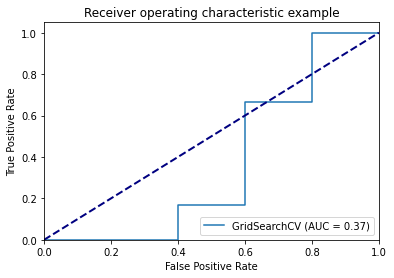

In [48]:
plot_roc_curve(model_lr, xTest, yTest) # 학습한 모델 객체 / xtest / ytest값 넣어주면 알아서 계산해 보여줌.

# 추가적으로 이 내용들을 작성해도 됨.
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # 대각선 선 하나 그려줌.
plt.xlim([0.0, 1.0]) # x축 범위
plt.ylim([0.0, 1.05]) # y축 범위
plt.xlabel('False Positive Rate') # x축이름
plt.ylabel('True Positive Rate') # y축이름
plt.title('Receiver operating characteristic example') # 이름
plt.legend(loc="lower right") # 레전드 어디다 둘지
plt.show() # 보여줘보쇼

## melanoma

In [57]:
xTrain, xTest, yTrain, yTest = train_test_split(np.array(melanoma['mutations']).reshape(-1,1), melanoma['label'], test_size = 0.1)

In [58]:
# 파라미터 넣고
grid_values = {'penalty': ['l1','l2', 'elasticnet', None],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'cv':[2,3,4,5,6]}
lr = LogisticRegressionCV()
model_lr = GridSearchCV(lr, param_grid=grid_values)

In [59]:
# 학습
model_lr.fit(xTrain, yTrain)
model_lr.score(xTest, yTest)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear

0.6666666666666666

In [60]:
from sklearn.metrics import confusion_matrix

pred = model_lr.predict(xTest)
confusion_matrix(yTest, pred)

array([[10,  0],
       [ 5,  0]])

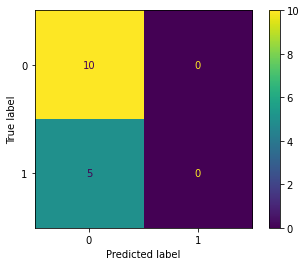

In [61]:
plot_confusion_matrix(model_lr, xTest, yTest) 

보아하니 모든 데이터를 0으로 판별하고있음;; 왜 그럴까


In [62]:
melanoma['label'].value_counts()

0    108
1     39
Name: label, dtype: int64

0이 하도 많으니 전체적으로 0으로 예측하도록 학습기가 바뀌는 것.
따라서 비율을 어느정도 1:1로 맞춰주는 게 좋음.
bootstraping같은 방식으로 1을 중복추출하든지 해서 1:1로 맞추면 보정될 것.

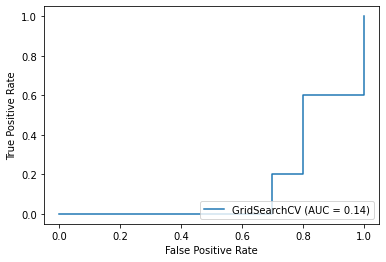

In [63]:
plot_roc_curve(model_lr, xTest, yTest)

직접 ROC를 만들고 싶을 때.

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(yTest, pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(yTest.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

lung / melanoma의 데이터를 합쳐서 돌려볼 것.

In [52]:
combined = lung.append(melanoma)
combined

,sample,mutations,pd1,label
0,1,160.0,PD,0.0
1,2,216.0,PR,1.0
2,3,32.0,SD,0.0
3,4,263.0,SD,0.0
4,5,451.0,SD,0.0
...,...,...,...,...
48,49E,2473.0,nonresponse,0.0
49,20E,3950.0,nonresponse,0.0
50,42E,287.0,nonresponse,0.0
51,45E,184.0,nonresponse,0.0


In [ ]:

### critical section ==============================================================================

# 학습/테스트 데이터 분리
xTrain, xTest, yTrain, yTest = train_test_split(np.array(combined['mutations']).reshape(-1,1), combined['label'], test_size = 0.1)



# 파라미터 넣어서 객체 생성
grid_values = {'penalty': ['l1','l2', 'elasticnet', None],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'cv':[2,3,4,5,6]}
lr = LogisticRegressionCV()
model_lr = GridSearchCV(lr, param_grid=grid_values)



# 학습
model_lr.fit(xTrain, yTrain)
# model_lr.score(xTest, yTest)



# confusion matrix 만들기
pred = model_lr.predict(xTest)
confusion_matrix(yTest, pred)


### critical section ==============================================================================

# 항상 그렇지만 pandas 데이터 전처리가 제일 복잡하지.
# 코드 자체는 이렇게 사용하면 됨.


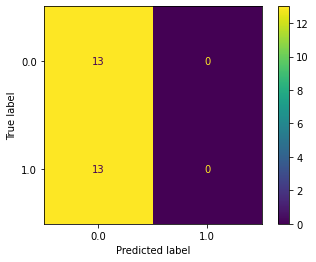

In [55]:
plot_confusion_matrix(model_lr, xTest, yTest) # confusion matrix 그림.

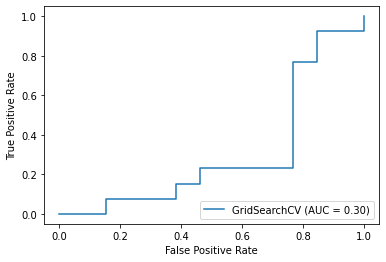

In [56]:
plot_roc_curve(model_lr, xTest, yTest) # ROC curve 그림.

## 유방암

In [64]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [65]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [67]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [69]:
df['label'] = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


해당 데이터를 가지고, logistic regression / 모델 성능 테스트 / ROC 그려보기.
feature는 하나만 갖고 해도 되고, 여러개, 모두를 사용해도 무방함.

In [ ]:
import sklearn

sklearn.__version__